<a href="https://colab.research.google.com/github/carineribeirost/cheminformatics-tutorials/blob/main/How_to_get_started_on_ChEMBL_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**How to get started on ChEMBL Database**
In this tutorial, we will learn how to install the ChEMBL API on Google Colab, perform a target search, preview it in a DataFrame, and give a data exploratory example.


##**Installing ChEMBL API**


In [1]:
!pip install chembl_webresource_client


     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 596 kB 17.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.0.1 which is incompatible.


##**Import libraries**


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from chembl_webresource_client.new_client import new_client

##**Target Search for Protein**



###**Choosing a target**
JAK3 kinase was chosen for illustration, but you can use any target you prefer.
A DataFrame has been created to display the result of the target search.


In [ ]:
target = new_client.target
target_query = target.search('JAK3')
targets = pd.DataFrame.from_dict(target_query)

In [37]:
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q62137', 'xref_name': None, 'xre...",Mus musculus,Tyrosine-protein kinase JAK3,19.0,False,CHEMBL5250,"[{'accession': 'Q62137', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Rattus norvegicus,Tyrosine-protein kinase JAK3,19.0,False,CHEMBL4295857,"[{'accession': 'Q63272', 'component_descriptio...",SINGLE PROTEIN,10116
2,"[{'xref_id': 'P52333', 'xref_name': None, 'xre...",Homo sapiens,Tyrosine-protein kinase JAK3,17.0,False,CHEMBL2148,"[{'accession': 'P52333', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Mus musculus,Tyrosine-protein kinase JAK1/JAK3,16.0,False,CHEMBL3885650,"[{'accession': 'P52332', 'component_descriptio...",PROTEIN FAMILY,10090
4,[],Homo sapiens,JAK3/JAK1,15.0,False,CHEMBL3038491,"[{'accession': 'P52333', 'component_descriptio...",PROTEIN COMPLEX,9606
5,[],Homo sapiens,Janus Kinase (JAK),13.0,False,CHEMBL2363062,"[{'accession': 'P52333', 'component_descriptio...",PROTEIN FAMILY,9606


###**Selecting by organism**
I have selected a human JAK3, as indicated in the index.


In [40]:
selected_target = targets.target_chembl_id[2] 
selected_target

'CHEMBL2148'

###**Filtering by activity**
Using the selected target, I filtered by activity to obtain all assay data.
A DataFrame has been created to visualize the result.



In [41]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target)

In [42]:
df_activity = pd.DataFrame.from_dict(res)


In [43]:
df_activity

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,129351,[],CHEMBL704118,Inhibition of Janus kinase 3,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C1NCc2c(-c3ccc(F)cc3F)cc(C3CCNCC3)cc2N1c1c(C...,None,None,CHEMBL1136271,Bioorg. Med. Chem. Lett.,2003.0,None,CHEMBL319556,None,CHEMBL319556,None,False,http://www.openphacts.org/units/Nanomolar,174932,>,1,True,>,None,IC50,nM,None,10000.0,CHEMBL2148,Homo sapiens,Tyrosine-protein kinase JAK3,9606,None,None,IC50,uM,UO_0000065,None,10.0
1,None,506157,[],CHEMBL872505,Inhibition of protein kinase Jak 3,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)(C)c1nc2c3ccc(F)cc3c3c(=O)[nH]ccc3c2[nH]1,None,None,CHEMBL1135866,Bioorg. Med. Chem. Lett.,2002.0,"{'bei': '26.83', 'le': '0.49', 'lle': '4.31', ...",CHEMBL21156,None,CHEMBL21156,8.30,True,http://www.openphacts.org/units/Nanomolar,25954,=,1,True,=,None,IC50,nM,None,5.0,CHEMBL2148,Homo sapiens,Tyrosine-protein kinase JAK3,9606,None,None,IC50,uM,UO_0000065,None,0.005
2,None,512200,[],CHEMBL704115,Inhibition of Jak3 kinase,B,None,None,BAO_0000190,BAO_0000357,single protein format,Cc1cccc(Cl)c1NC(=O)c1cnc(NC(=O)C2CC2)s1,None,None,CHEMBL1136358,Bioorg. Med. Chem. Lett.,2003.0,"{'bei': '21.91', 'le': '0.46', 'lle': '3.65', ...",CHEMBL131577,None,CHEMBL131577,7.36,False,http://www.openphacts.org/units/Nanomolar,248112,=,1,True,=,None,IC50,nM,None,44.0,CHEMBL2148,Homo sapiens,Tyrosine-protein kinase JAK3,9606,None,None,IC50,uM,UO_0000065,None,0.044
3,None,592735,[],CHEMBL704113,Inhibitory activity against Janus Kinase 3 pro...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C1Nc2ccc(NC(=O)c3ccccc3)cc2/C1=C/c1ccc[nH]1,None,None,CHEMBL1136217,Bioorg. Med. Chem. Lett.,2003.0,"{'bei': '18.40', 'le': '0.33', 'lle': '2.30', ...",CHEMBL104409,None,CHEMBL104409,6.06,False,http://www.openphacts.org/units/Nanomolar,197466,=,1,True,=,None,IC50,nM,None,870.0,CHEMBL2148,Homo sapiens,Tyrosine-protein kinase JAK3,9606,None,None,IC50,uM,UO_0000065,None,0.87
4,None,596590,[],CHEMBL704113,Inhibitory activity against Janus Kinase 3 pro...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C1Nc2ccc(C(=O)O)cc2/C1=C/c1ccc[nH]1,None,None,CHEMBL1136217,Bioorg. Med. Chem. Lett.,2003.0,"{'bei': '26.24', 'le': '0.48', 'lle': '4.46', ...",CHEMBL107225,None,CHEMBL107225,6.67,False,http://www.openphacts.org/units/Nanomolar,197464,=,1,True,=,None,IC50,nM,None,213.0,CHEMBL2148,Homo sapiens,Tyrosine-protein kinase JAK3,9606,None,None,IC50,uM,UO_0000065,None,0.213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7532,Not Active,20780889,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4507542,KinomeScan assay: inhibition of JAK3(JH1domain...,B,None,None,BAO_0000179,BAO_0000357,single protein format,O=C(NC[C@H]1[C@@H]2CN(C(=O)OCc3cc(C(F)(F)F)cc(...,None,None,CHEMBL4507275,None,2021.0,None,CHEMBL4165749,BI 2545,CHEMBL4165749,None,False,http://qudt.org/vocab/unit#Percent,3359679,None,54,False,None,None,% Control,%,None,69.0,CHEMBL2148,Homo sapiens,Tyrosine-protein kinase JAK3,9606,None,None,% Control,%,UO_0000187,None,69.0
7533,Not Active,20781357,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4507542,KinomeScan assay: inhibition of JAK3(JH1domain...,B,None,None,

To see all the indexes, just use the command below:


In [45]:
df_activity.columns

Index(['activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

##**Exploratory Data Analysis (example)**
Using the matplotlib library, I created a chart showing the top 10 standard types.


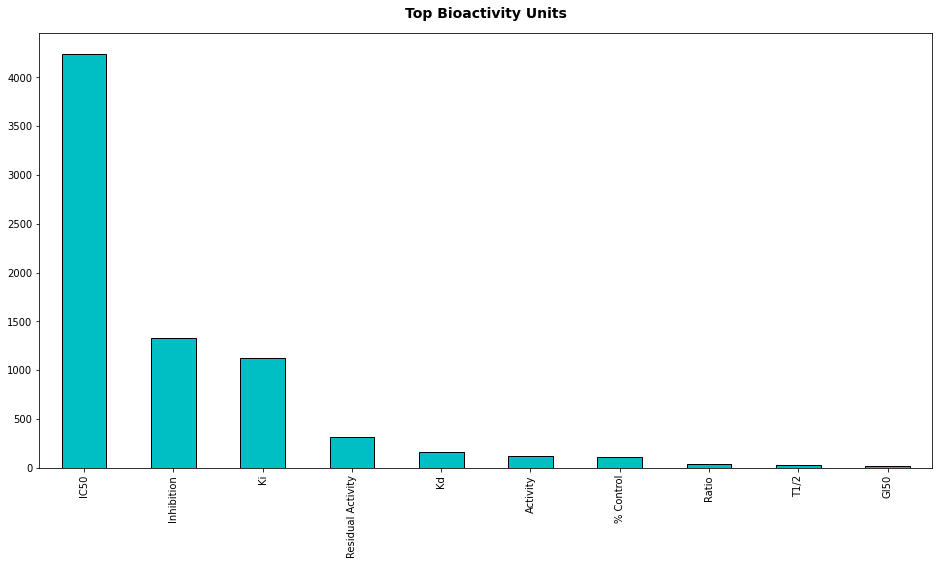

In [48]:
df_activity.standard_type.value_counts()[:10].plot.bar(figsize=(16,8), color='#00BFC4', ec='black')

plt.title('Top Bioactivity Units', fontsize=14, fontweight='black', pad=15)
plt.show()